In [ ]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset
!unzip heart-disease-dataset.zip
!ls

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 10.4MB/s]
Archive:  heart-disease-dataset.zip
  inflating: heart.csv               
heart.csv  heart-disease-dataset.zip  sample_data


In [ ]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import roc_curve,plot_roc_curve

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

### Importing the dataset

In [ ]:
df=pd.read_csv('heart.csv')

### Shape of the dataset (Rows, Columns)

In [ ]:
df.shape

(1025, 14)

### Head of the dataset

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [ ]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [ ]:
# View of the Renamed Dataframe
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Information about the data

In [ ]:
df1 = df.copy()                               # Create copy of DataFrame
df1['ST_depression'] = df1['ST_depression'].astype(int)         # Transform float to integer
print(df1)

      Age  Sex  Chest_pain  Resting_blood_pressure  Cholesterol  \
0      52    1           0                     125          212   
1      53    1           0                     140          203   
2      70    1           0                     145          174   
3      61    1           0                     148          203   
4      62    0           0                     138          294   
...   ...  ...         ...                     ...          ...   
1020   59    1           1                     140          221   
1021   60    1           0                     125          258   
1022   47    1           0                     110          275   
1023   50    0           0                     110          254   
1024   54    1           0                     120          188   

      Fasting_blood_sugar  ECG_results  Maximum_heart_rate  \
0                       0            1                 168   
1                       1            0                 155   
2        

In [ ]:
df=df1

In [ ]:
list(df.columns.values)

['Age',
 'Sex',
 'Chest_pain',
 'Resting_blood_pressure',
 'Cholesterol',
 'Fasting_blood_sugar',
 'ECG_results',
 'Maximum_heart_rate',
 'Exercise_induced_angina',
 'ST_depression',
 'ST_slope',
 'Major_vessels',
 'Thalassemia_types',
 'Heart_disease']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1025 non-null   int64
 1   Sex                      1025 non-null   int64
 2   Chest_pain               1025 non-null   int64
 3   Resting_blood_pressure   1025 non-null   int64
 4   Cholesterol              1025 non-null   int64
 5   Fasting_blood_sugar      1025 non-null   int64
 6   ECG_results              1025 non-null   int64
 7   Maximum_heart_rate       1025 non-null   int64
 8   Exercise_induced_angina  1025 non-null   int64
 9   ST_depression            1025 non-null   int64
 10  ST_slope                 1025 non-null   int64
 11  Major_vessels            1025 non-null   int64
 12  Thalassemia_types        1025 non-null   int64
 13  Heart_disease            1025 non-null   int64
dtypes: int64(14)
memory usage: 112.2 KB


### Description about the dataset

In [ ]:
df.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,0.796098,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.085408,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


### Are there any missing values?

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
Chest_pain,0
Resting_blood_pressure,0
Cholesterol,0
Fasting_blood_sugar,0
ECG_results,0
Maximum_heart_rate,0
Exercise_induced_angina,0
ST_depression,0


### Correlation matrix & Matrix Visualisation

In [ ]:
df.corr()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
Age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.176600,-0.169105,0.271551,0.072297,-0.229324
Sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.076966,-0.026666,0.111729,0.198424,-0.279501
Chest_pain,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.205374,0.131633,-0.176206,-0.163341,0.434854
Resting_blood_pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.183719,-0.120445,0.104554,0.059276,-0.138772
Cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.049439,-0.014248,0.074259,0.100244,-0.099966
Fasting_blood_sugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.028257,-0.061902,0.137156,-0.042177,-0.041164
ECG_results,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.044794,0.086086,-0.078072,-0.020504,0.134468
Maximum_heart_rate,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.332975,0.395308,-0.207888,-0.098068,0.422895
Exercise_induced_angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.291829,-0.267335,0.107849,0.197201,-0.438029
ST_depression,0.176600,0.076966,-0.205374,0.183719,0.049439,0.028257,-0.044794,-0.332975,0.291829,1.000000,-0.552656,0.231840,0.193807,-0.429551


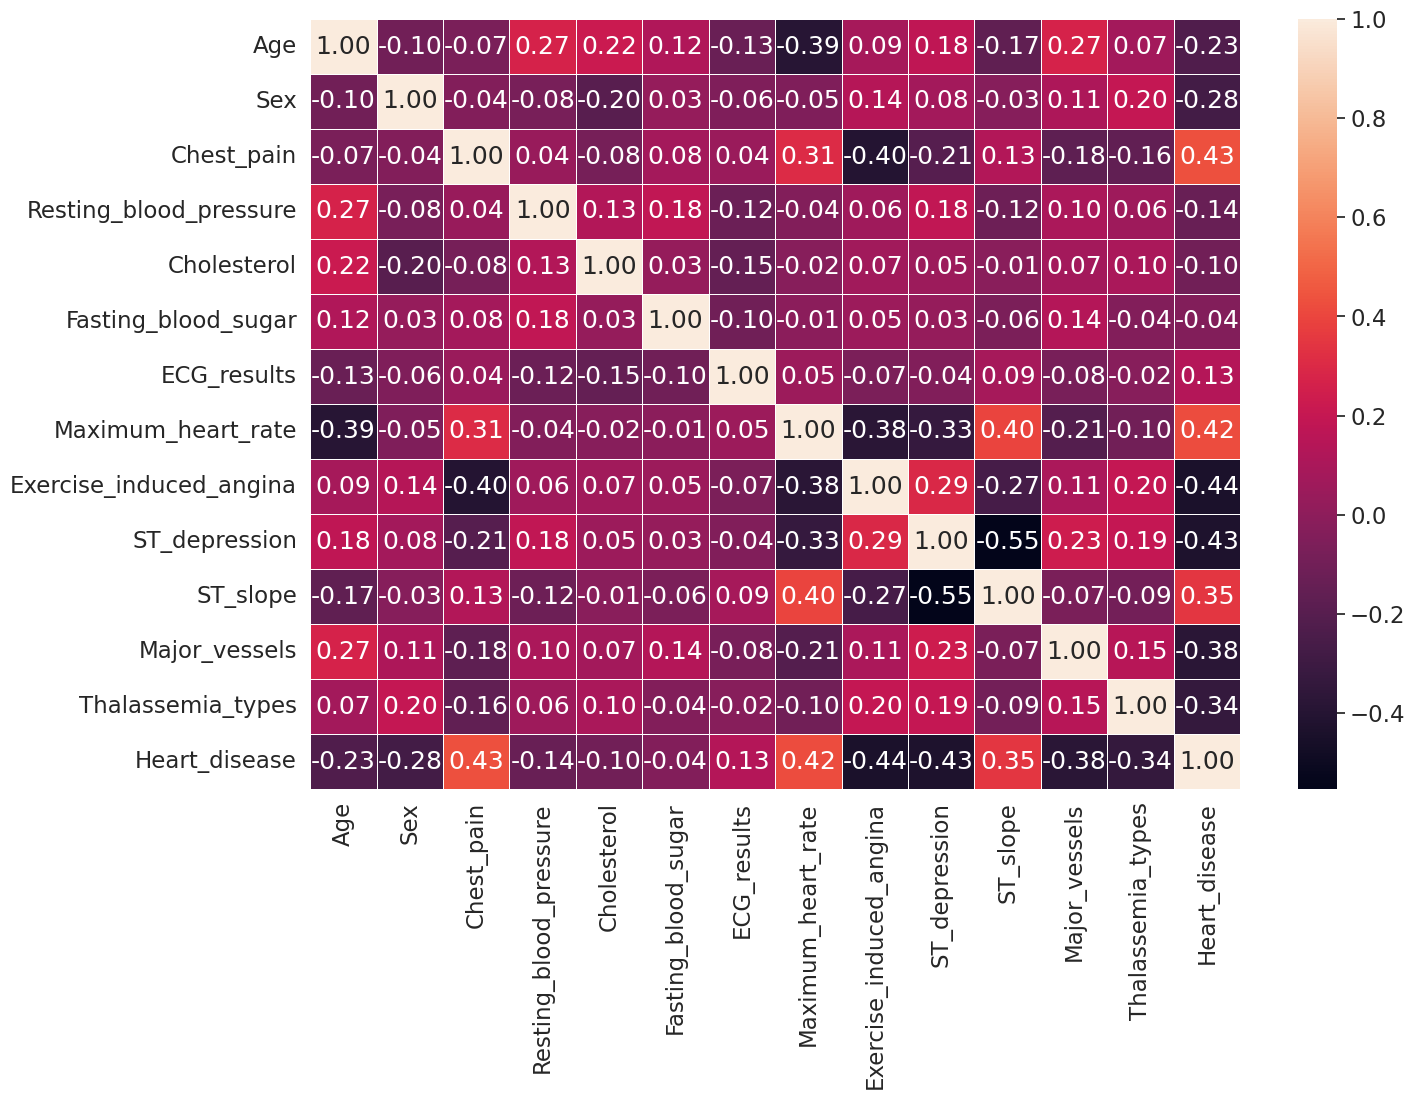

In [ ]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [ ]:
X=df.drop(['Heart_disease'],axis=1)
y=df['Heart_disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types
0,52,1,0,125,212,0,1,168,0,1,2,2,3
1,53,1,0,140,203,1,0,155,1,3,0,0,3
2,70,1,0,145,174,0,1,125,1,2,0,0,3
3,61,1,0,148,203,0,1,161,0,0,2,1,3
4,62,0,0,138,294,1,1,106,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2,1,1,3
1022,47,1,0,110,275,0,0,118,1,1,1,1,2
1023,50,0,0,110,254,0,0,159,0,0,2,0,2


In [ ]:
y

,Heart_disease
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


## 1. Logistic Regression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Training score

lr.score(X_train,y_train)

0.8670731707317073

In [ ]:
#Prediction of the test variable

lr_y_preds=lr.predict(X_test)

In [ ]:
#Testing accuracy

lr.score(X_test,y_test)

0.7951219512195122

### Confusion Matrix

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


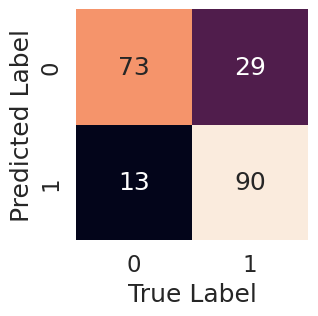

In [ ]:
plot_conf_mat(y_test,lr_y_preds)

### ROC Curve

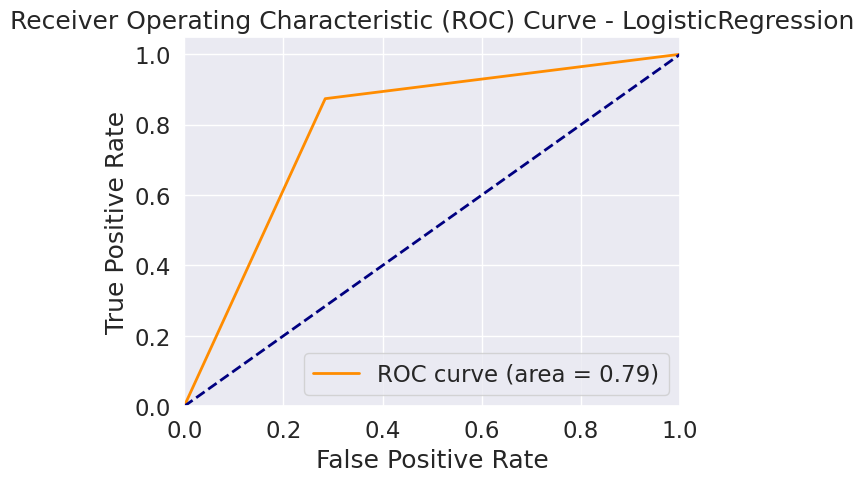

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LogisticRegression')
plt.legend(loc="lower right")
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



## 2. K-Nearest Neighbour

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#Training score

knn.score(X_train,y_train)

0.9231707317073171

In [ ]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [ ]:
#Testing accuracy

knn.score(X_test,y_test)

0.7317073170731707

### Confusion Matrix

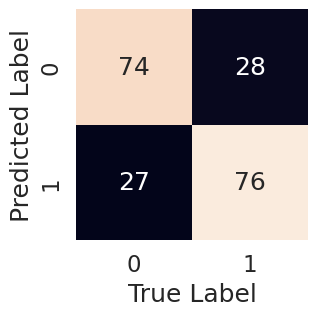

In [ ]:
plot_conf_mat(y_test,knn_y_preds)

### ROC Curve

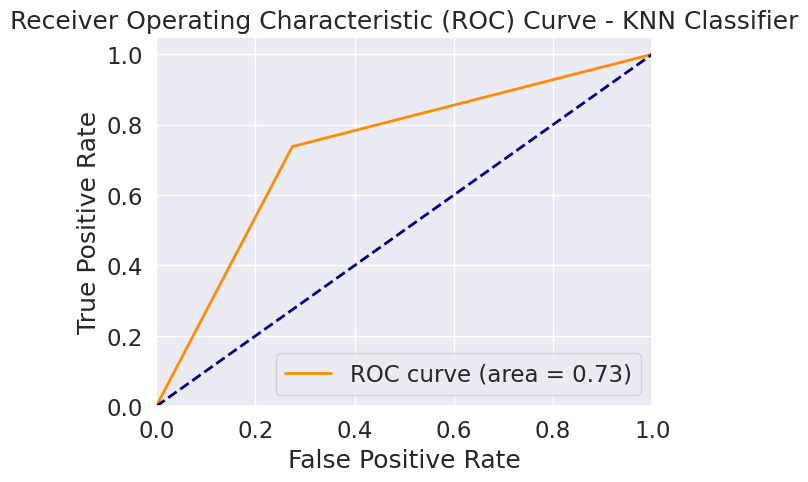

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN Classifier')
plt.legend(loc="lower right")
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Training score

rf.score(X_train,y_train)

1.0

In [ ]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)

In [ ]:
#Testing accuracy

rf.score(X_test,y_test)

0.9853658536585366

### Confusion Matrix

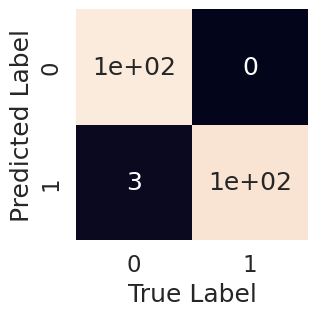

In [ ]:
plot_conf_mat(y_test,rf_y_preds)

### ROC Curve

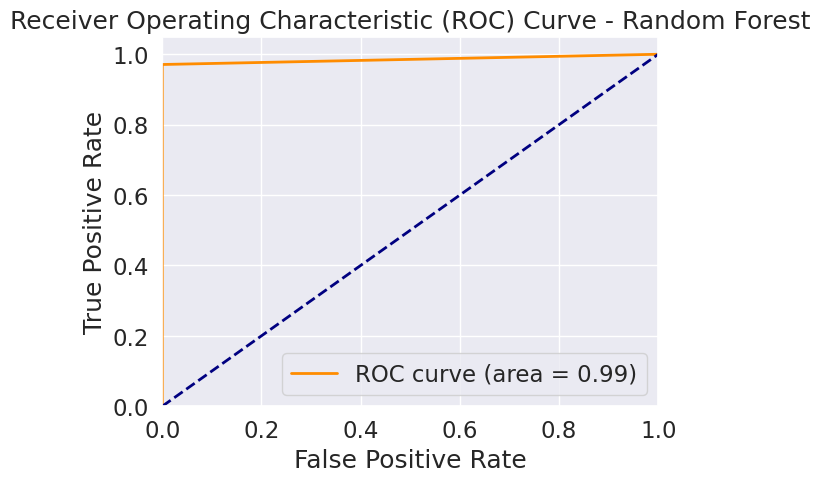

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
svm.score(X_train,y_train)

0.723170731707317

In [ ]:
preds=svm.predict(X_test)
svm.score(X_test,y_test)

0.6829268292682927

### ROC Curve

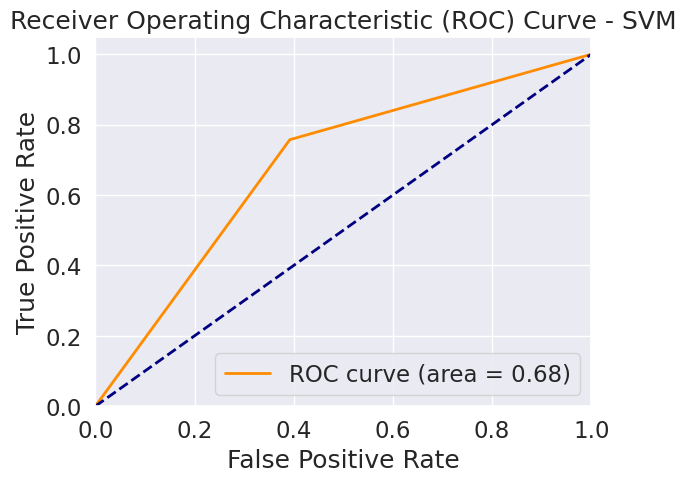

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test),
             'svm':svm.score(X_test,y_test)}

In [ ]:
model_scores

{'Logistic Regression': 0.7951219512195122,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366,
 'svm': 0.6829268292682927}

## Model Comparison

In [ ]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest,svm
accuracy,0.795122,0.731707,0.985366,0.682927


In [ ]:
from joblib import Parallel, delayed
import joblib
#joblib.dump(lr, 'heart.sav')

<Axes: >

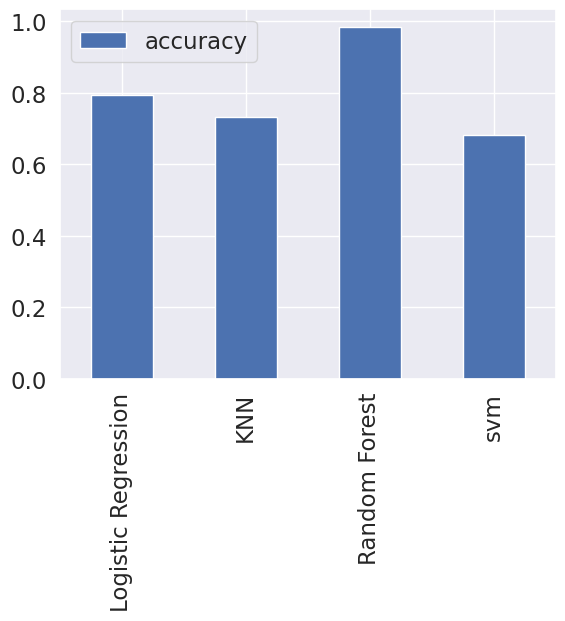

In [ ]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

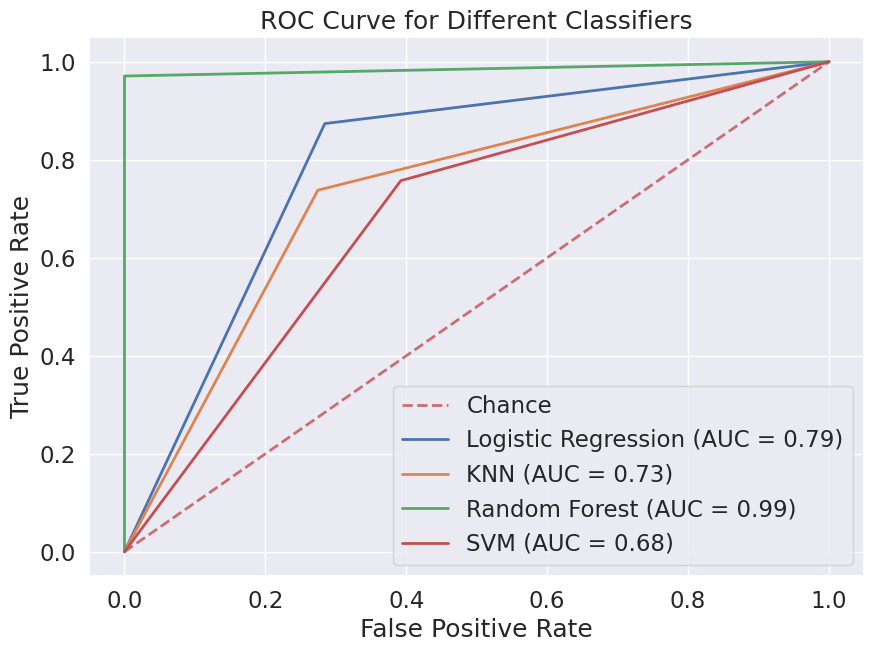

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

# Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, lr_y_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)

# KNN
fpr, tpr, thresholds = roc_curve(y_test, knn_y_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='KNN (AUC = %0.2f)' % roc_auc)

# Random Forest
fpr, tpr, thresholds = roc_curve(y_test, rf_y_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)


# SVM
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='SVM (AUC = %0.2f)' % roc_auc)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from google.colab import files
import joblib

joblib.dump(rf, 'heart_disease_pred.sav')

files.download('heart_disease_pred.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>